In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import StratifiedShuffleSplit
from pandas.plotting import scatter_matrix
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from zipfile import ZipFile

import warnings
warnings.filterwarnings('ignore')
sns.set_theme(style='whitegrid', palette='muted',
        rc={'figure.figsize': (6,6)})
%matplotlib inline
from statsmodels.graphics.gofplots import qqplot
from statsmodels.formula.api import ols
from sklearn.model_selection import GridSearchCV

In [5]:
df=pd.read_csv("C:\\Users\\user\\Downloads\\housing.csv (1).zip")
df.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

Data Science Step

1.Gather the Data and Data Inspection

2.Data Cleaning

3.Data Exploration and Visualization

4.Preprocessing and Data Preparation for Modeling

5.Data Modeling: Applying the Required ML Algorithm

6.Model Selection and Interpretation

7.Model Deployment and Monitoring

In [6]:
from IPython.display import display, HTML

# Display the HTML content with styling
display(HTML('<h1 style="color: white;">Gather the Data and Data Inspection</h1>'))

In [7]:
# # Since we have the data, we only need to zip the file

# with ZipFile("/content/housing.csv (1).zip") as f:
#   f.extractall()

In [8]:
df.shape

(20640, 10)

In [9]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [11]:
df.ocean_proximity.unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [13]:
df.ocean_proximity.value_counts().sort_values(ascending=False)

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [14]:
df.isna().sum()[df.isna().sum()>0]

total_bedrooms    207
dtype: int64

In [15]:
(df.isna().sum()/df.shape[0])*100

longitude             0.000000
latitude              0.000000
housing_median_age    0.000000
total_rooms           0.000000
total_bedrooms        1.002907
population            0.000000
households            0.000000
median_income         0.000000
median_house_value    0.000000
ocean_proximity       0.000000
dtype: float64

In [16]:
df[df.isna().any(axis=1)]

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
290      -122.16     37.77                47.0       1256.0             NaN   
341      -122.17     37.75                38.0        992.0             NaN   
538      -122.28     37.78                29.0       5154.0             NaN   
563      -122.24     37.75                45.0        891.0             NaN   
696      -122.10     37.69                41.0        746.0             NaN   
...          ...       ...                 ...          ...             ...   
20267    -119.19     34.20                18.0       3620.0             NaN   
20268    -119.18     34.19                19.0       2393.0             NaN   
20372    -118.88     34.17                15.0       4260.0             NaN   
20460    -118.75     34.29                17.0       5512.0             NaN   
20484    -118.72     34.28                17.0       3051.0             NaN   

       population  households  median_income  median_house_value  \
290         570.0       218.0         4.3750            161900.0   
341         732.0       259.0         1.6196             85100.0   
538        3741.0      1273.0         2.5762            173400.0   
563         384.0       146.0         4.9489            247100.0   
696         387.0       161.0         3.9063            178400.0   
...           ...         ...            ...                 ...   
20267      3171.0       779.0         3.3409            220500.0   
20268      1938.0       762.0         1.6953            167400.0   
20372      1701.0       669.0         5.1033            410700.0   
20460      2734.0       814.0         6.6073            258100.0   
20484      1705.0       495.0         5.7376            218600.0   

      ocean_proximity  
290          NEAR BAY  
341          NEAR BAY  
538          NEAR BAY  
563          NEAR BAY  
696          NEAR BAY  
...               ...  
20267      NEAR OCEAN  
20268      NEAR OCEAN  
20372       <1H OCEAN  
20460       <1H OCEAN  
20484       <1H OCEAN  

[207 rows x 10 columns]

In [17]:
df.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

In [18]:
from IPython.display import display, HTML

# Display the HTML content with styling
display(HTML('<h1 style="color: white;">Data Cleaning</h1>'))

In [19]:
number=df.select_dtypes(np.number)
number.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value  
0       322.0       126.0         8.3252            452600.0  
1      2401.0      1138.0         8.3014            358500.0  
2       496.0       177.0         7.2574            352100.0  
3       558.0       219.0         5.6431            341300.0  
4       565.0       259.0         3.8462            342200.0

In [20]:
df_cat = df.select_dtypes('object')
df_cat.head()

ocean_proximity
0        NEAR BAY
1        NEAR BAY
2        NEAR BAY
3        NEAR BAY
4        NEAR BAY

In [21]:
imputer=SimpleImputer(strategy="median")
imputer.fit_transform(number)

array([[-1.2223e+02,  3.7880e+01,  4.1000e+01, ...,  1.2600e+02,
         8.3252e+00,  4.5260e+05],
       [-1.2222e+02,  3.7860e+01,  2.1000e+01, ...,  1.1380e+03,
         8.3014e+00,  3.5850e+05],
       [-1.2224e+02,  3.7850e+01,  5.2000e+01, ...,  1.7700e+02,
         7.2574e+00,  3.5210e+05],
       ...,
       [-1.2122e+02,  3.9430e+01,  1.7000e+01, ...,  4.3300e+02,
         1.7000e+00,  9.2300e+04],
       [-1.2132e+02,  3.9430e+01,  1.8000e+01, ...,  3.4900e+02,
         1.8672e+00,  8.4700e+04],
       [-1.2124e+02,  3.9370e+01,  1.6000e+01, ...,  5.3000e+02,
         2.3886e+00,  8.9400e+04]])

In [22]:
number.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

In [23]:
df=pd.DataFrame(imputer.fit_transform(number),columns=number.columns)
df.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value  
0       322.0       126.0         8.3252            452600.0  
1      2401.0      1138.0         8.3014            358500.0  
2       496.0       177.0         7.2574            352100.0  
3       558.0       219.0         5.6431            341300.0  
4       565.0       259.0         3.8462            342200.0

In [24]:
df.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

In [25]:
# Now joining our data back
df = pd.concat([df, df_cat], axis=1)
df.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [26]:
from IPython.display import display, HTML

# Display the HTML content with styling
display(HTML('<h1 style="color: white;">Data Exploration and Visualization</h1>'))

In [27]:
import warnings
warnings.filterwarnings("ignore")

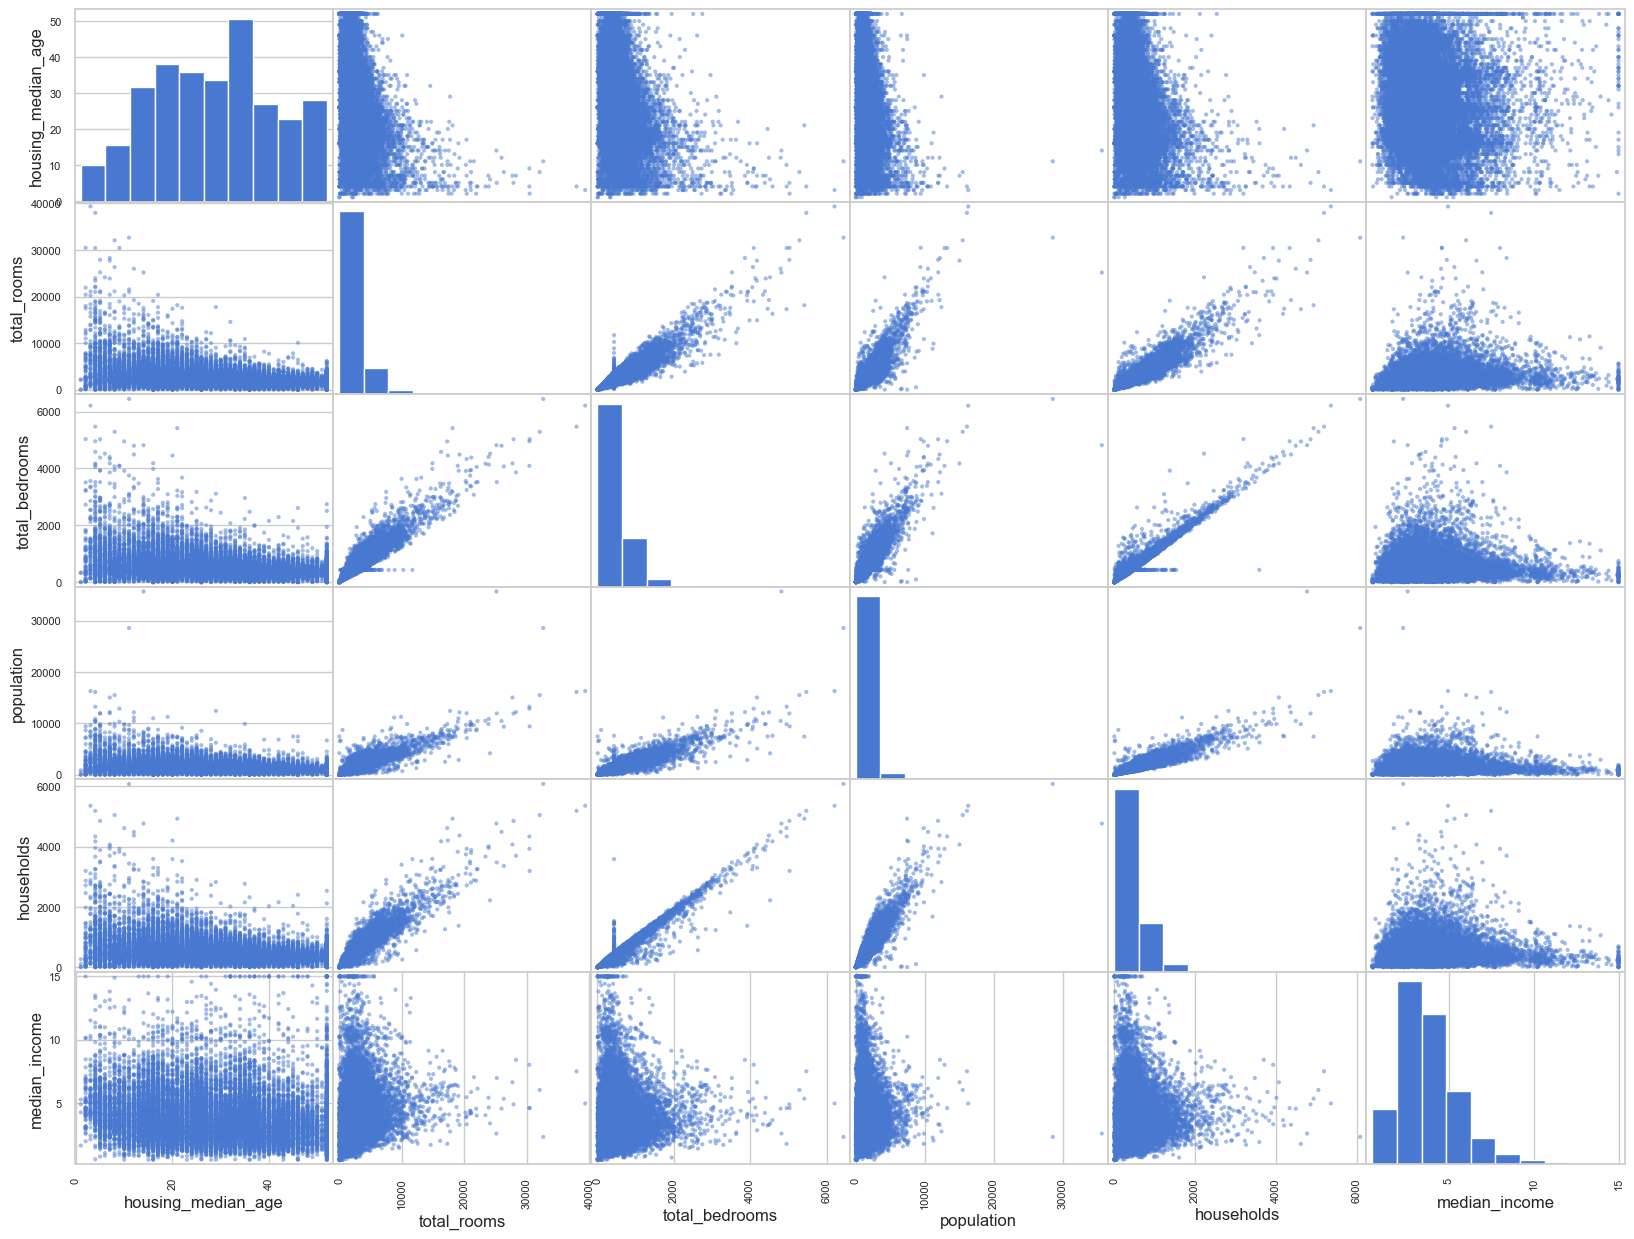

In [87]:
col= ["housing_median_age",	"total_rooms", "total_bedrooms",
        "population",	"households", "median_income"]
scatter_matrix(df[col],figsize=(20,15))
plt.show()

In [28]:
numeric=number.columns.to_list()[2:]
numeric

['housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value']

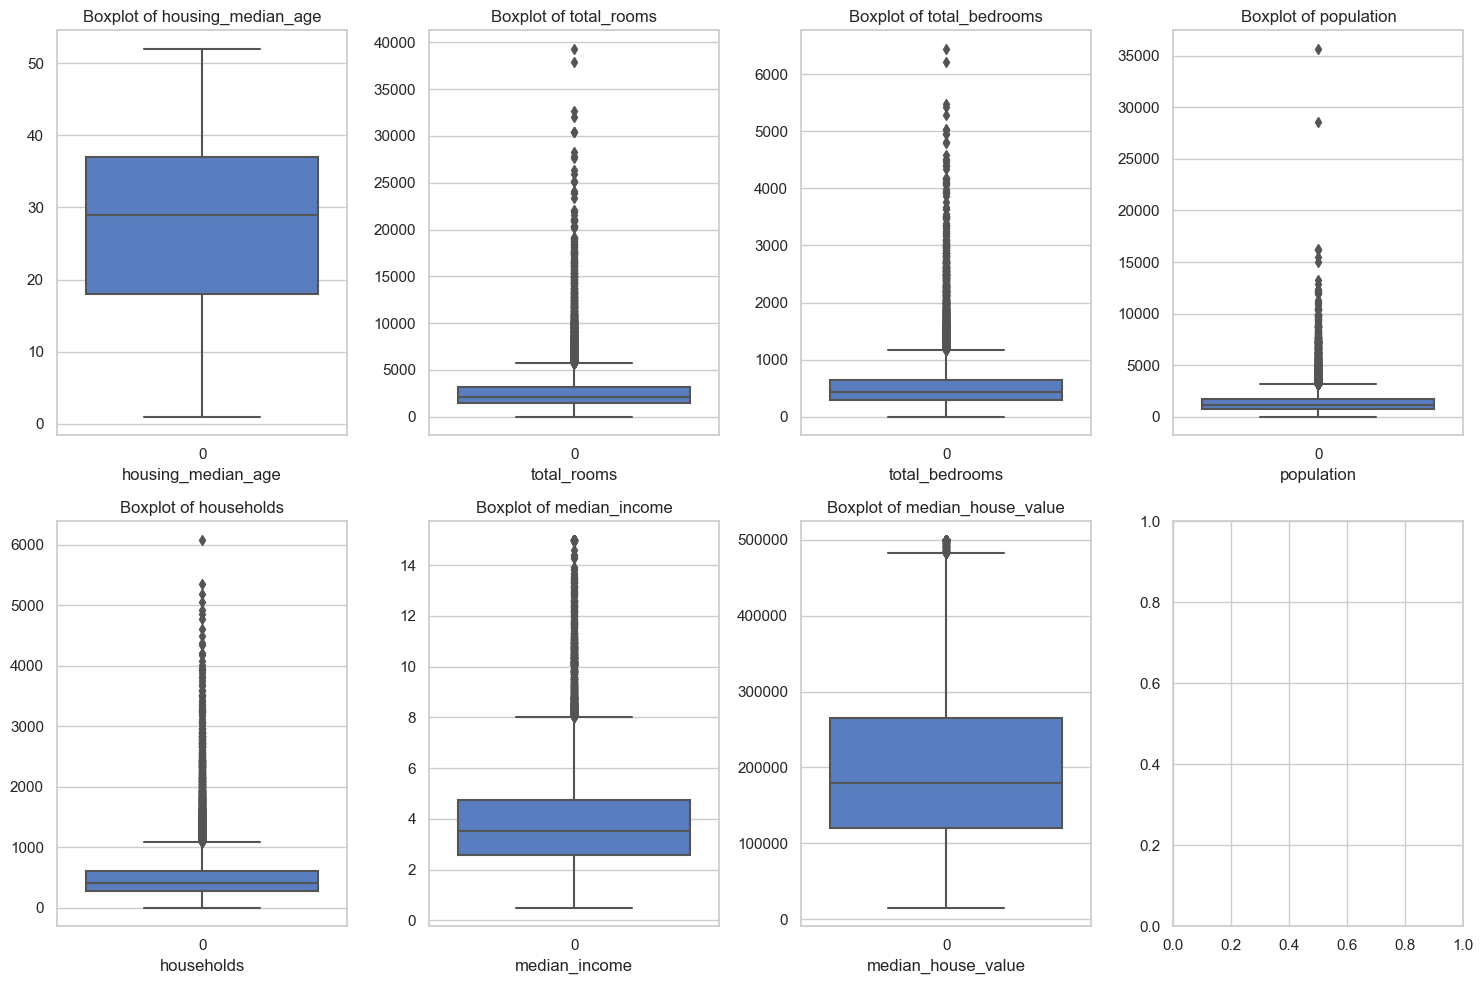

In [30]:
fig, ax = plt.subplots(2, 4, figsize=(15, 10))
ax = ax.flatten()
for i in range(len(numeric)):
    sns.boxplot(number[numeric[i]], ax=ax[i])
    ax[i].set_title(f"Boxplot of {numeric[i]}")
    ax[i].set_xlabel(numeric[i])
plt.tight_layout()

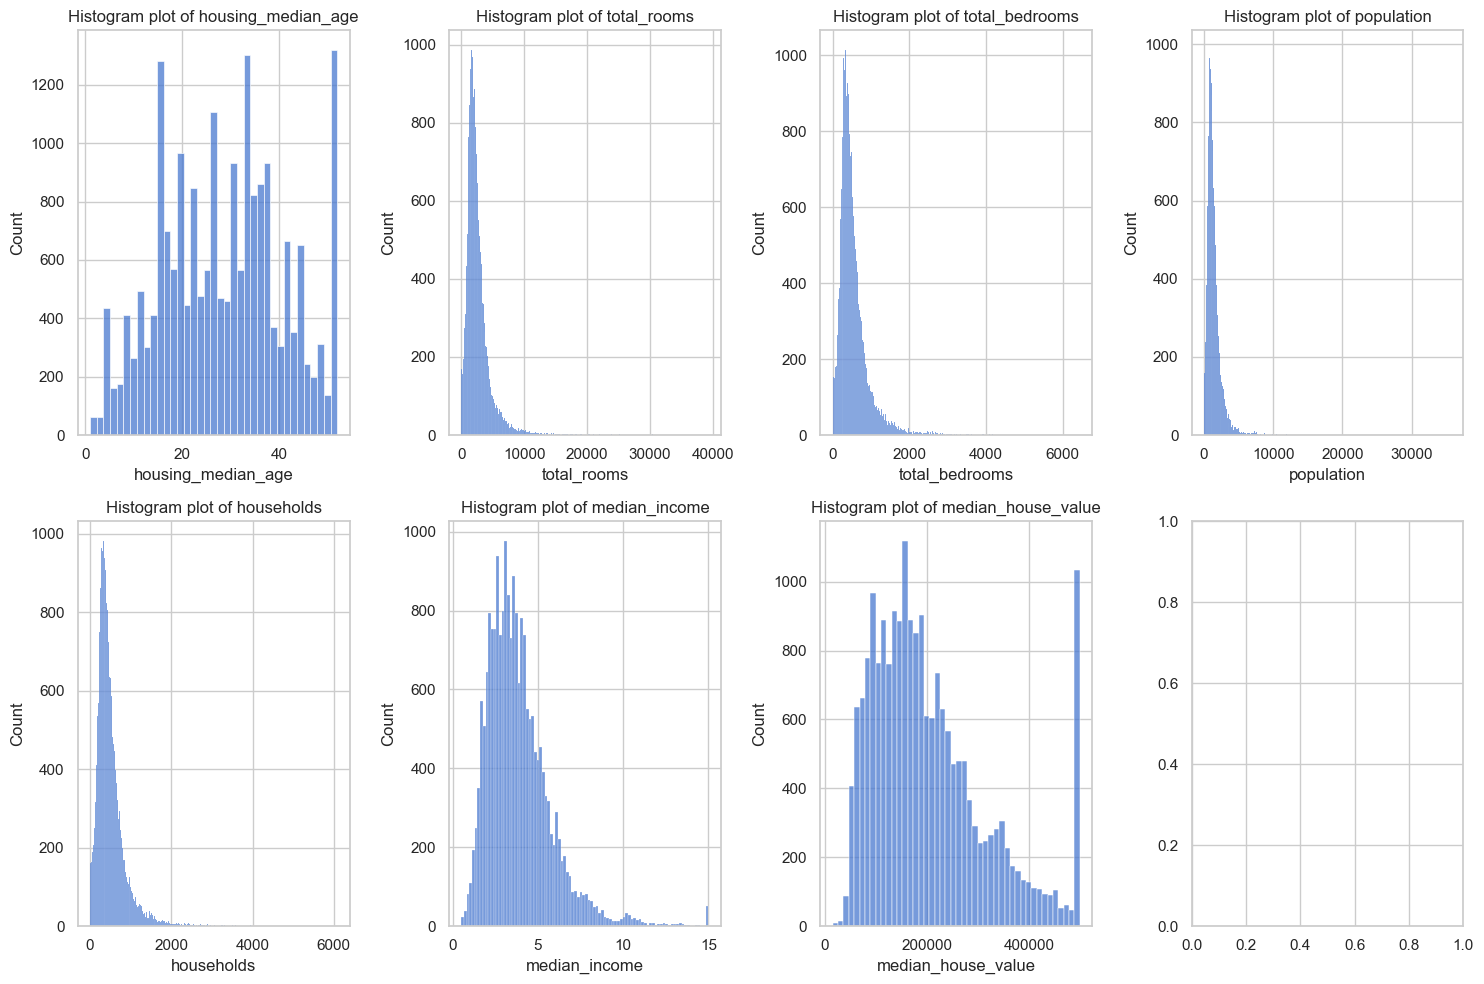

In [90]:
fig, ax = plt.subplots(2, 4, figsize=(15, 10))
ax = ax.flatten()
for i in range(len(numeric)):
    sns.histplot(number[numeric[i]], ax=ax[i])
    ax[i].set_title(f"Histogram plot of {numeric[i]}")
    ax[i].set_xlabel(numeric[i])
plt.tight_layout()

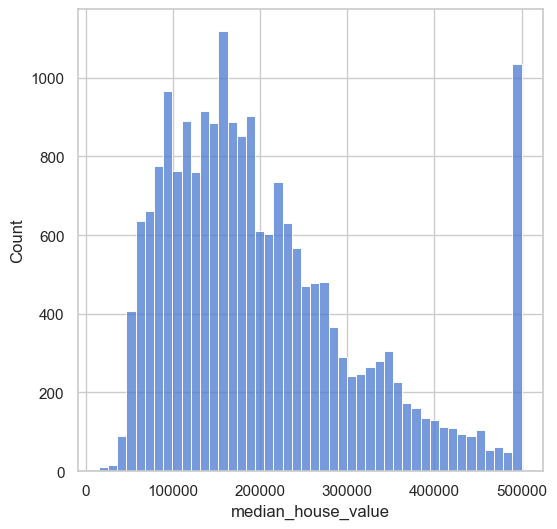

In [31]:
sns.histplot(number["median_house_value"])
plt.show()

In [32]:
number.corr()["median_house_value"].abs().sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
latitude              0.144160
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
longitude             0.045967
population            0.024650
Name: median_house_value, dtype: float64

<Axes: >

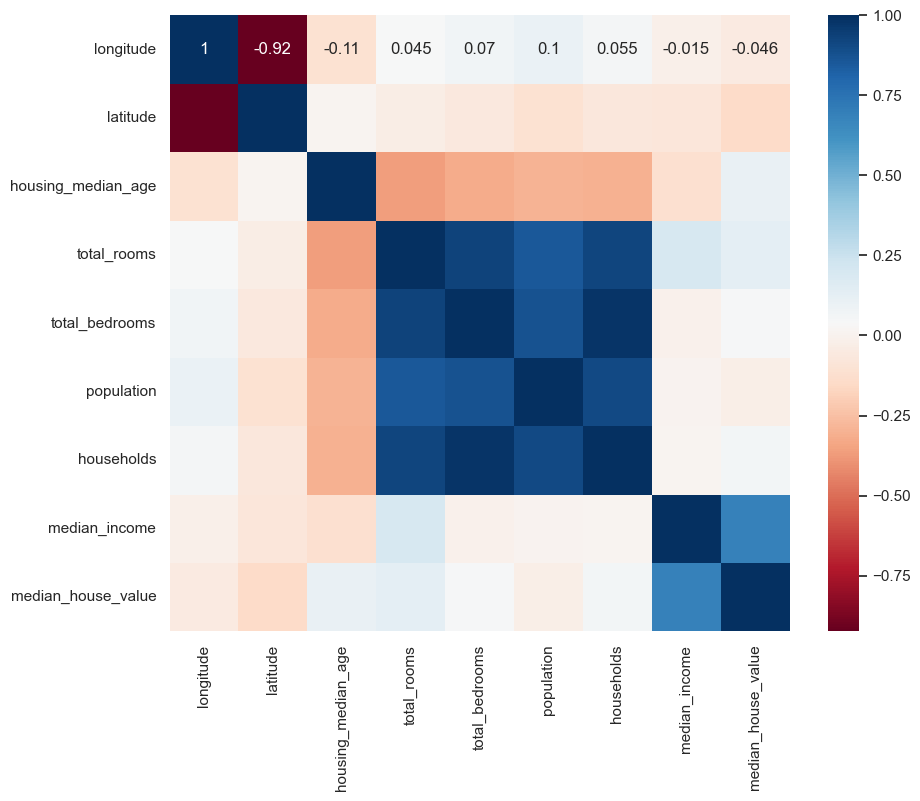

In [93]:
plt.figure(figsize=(10,8))
sns.heatmap(number.corr(),annot=True,cmap="RdBu")

In [33]:
numeric_cols = numeric[:-1]
numeric_cols

['housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income']

In [34]:
numeric = numeric[:-1]

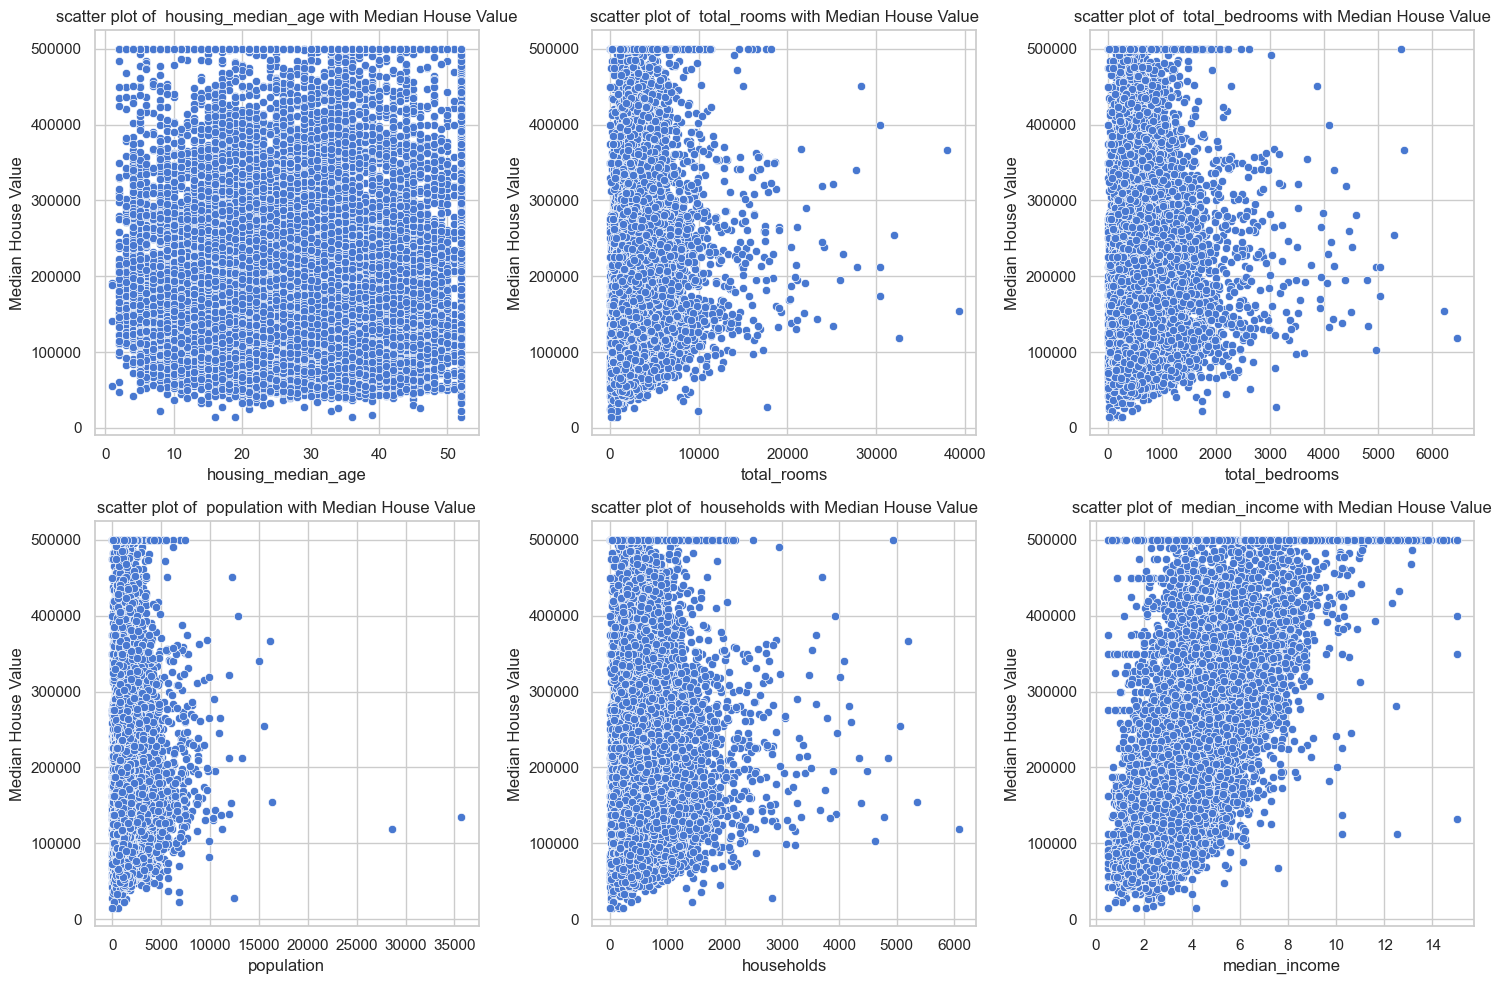

In [35]:
fig,ax=plt.subplots(2,3,figsize=(15,10))
ax=ax.flatten()
for i in range(len(numeric)):
    sns.scatterplot(x=number[numeric[i]],y=df["median_house_value"],ax=ax[i])
    ax[i].set_title(f"scatter plot of  {numeric[i]} with Median House Value")
    ax[i].set_xlabel(numeric[i])
    ax[i].set_ylabel("Median House Value")
plt.tight_layout()

important Information

1.These attributes have very different scales. So we will be scaling the features
2.Problem of Multi Collinearity: Feature Engineering
3.The housing median age, and the median house value were both capped. This may later be a serious problem since it is our target. Our Ml Algorithm may learn that the price never goes beyond that limit. a. Remove the capped values from the train and test set in case
4.The histogram distribution of most plot are heavy tailed, that is skewed to the right, We will be transforming the attribute to have more bell shape distribution.

<Axes: xlabel='longitude', ylabel='latitude'>

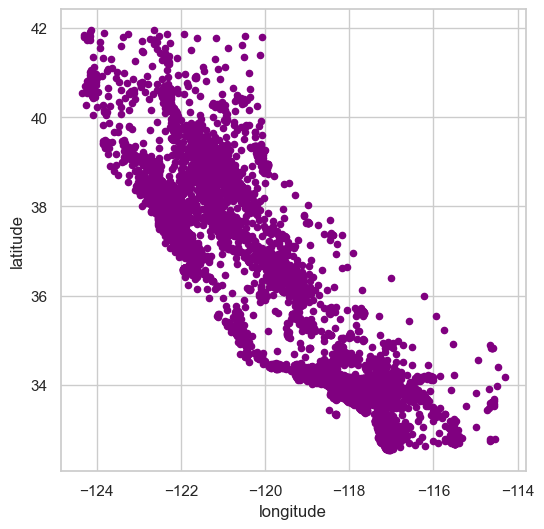

In [36]:
df.plot(kind="scatter",x="longitude",y="latitude",color="purple")

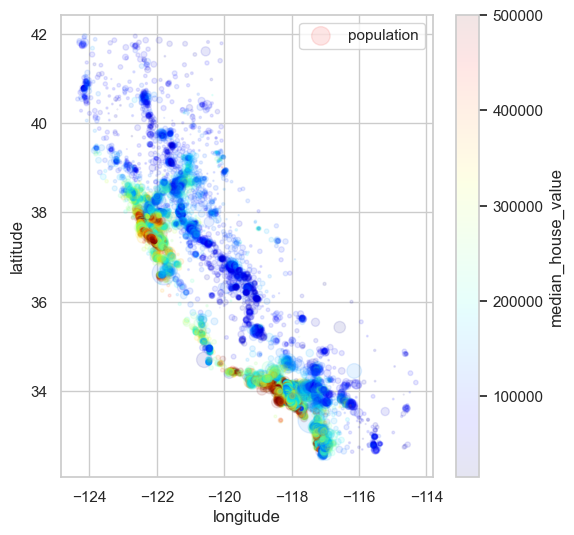

In [37]:
df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1,
        s=df["population"]/100,label="population",
        c="median_house_value",cmap=plt.get_cmap("jet"),colorbar=True)

plt.xlabel=("longitude")
plt.ylabel=("latitude")
plt.legend()
plt.show()

In [99]:
import plotly.express as px

In [100]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [101]:
# Create a scatter mapbox plot
fig = px.scatter_mapbox(
    df,
    lat='latitude',
    lon='longitude',
    color='median_house_value',
    size='median_house_value',
    color_continuous_scale='Viridis',
    zoom=2,
    height=600,
    hover_data={
        'latitude': True,
        'longitude': True,
        'median_house_value': True,
        'ocean_proximity': True
    }
)

# Use a mapbox style
fig.update_layout(mapbox_style='open-street-map')

# Show the plot
fig.show()

This image tells you that the housing prices are very much related to the location (e.g., close to the ocean) and to the population density, as you probably knew already. It will probably be useful to use a clustering algorithm to detect the main clusters, and add new features that measure the proximity to the cluster centers.

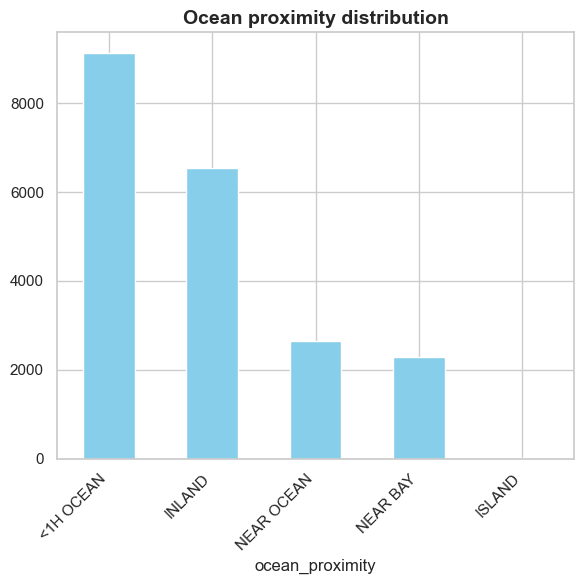

In [38]:
df['ocean_proximity'].value_counts().sort_values(ascending=False).plot(kind="bar", color='skyblue')

# Labeling the chart
# plt.xlabel("Ocean Proximity", fontdict={'fontsize': 12, 'fontweight': 'bold'}, loc='center')
# plt.ylabel("Number of houses", fontdict={'fontsize': 12, 'fontweight': 'bold'})
plt.title("Ocean proximity distribution", fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()  # Adjust layout to make room for labels
plt.show()

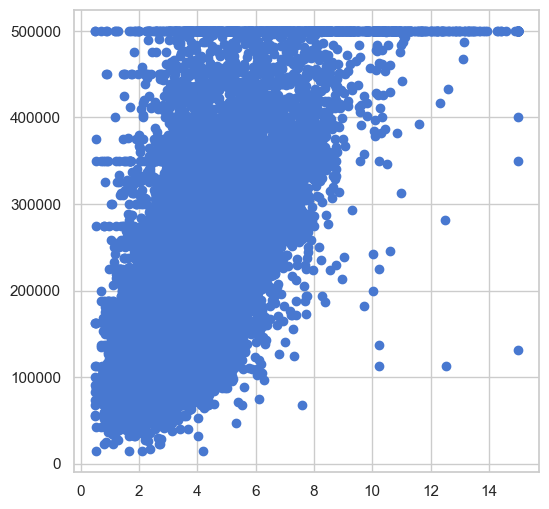

In [103]:
plt.scatter(x=df["median_income"],y=df["median_house_value"]);

In [39]:
df[df["median_house_value"]==500000].head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
4719    -118.38     34.06                25.0       2558.0           661.0   
4823    -118.31     34.05                26.0       1809.0           640.0   
5301    -118.45     34.06                20.0       3367.0          1264.0   
5308    -118.44     34.05                32.0       1880.0           435.0   
6776    -118.15     34.12                49.0       1789.0           288.0   

      population  households  median_income  median_house_value  \
4719      1183.0       636.0         3.5556            500000.0   
4823      2543.0       640.0         2.3536            500000.0   
5301      2667.0      1131.0         2.2444            500000.0   
5308       798.0       417.0         4.7109            500000.0   
6776       848.0       311.0         6.0199            500000.0   

     ocean_proximity  
4719       <1H OCEAN  
4823       <1H OCEAN  
5301       <1H OCEAN  
5308       <1H OCEAN  
6776       <1H OCEAN

In [40]:
df.shape

(20640, 10)

In [41]:
df[df["median_house_value"]==500000].shape

(27, 10)

In [42]:
df[df["housing_median_age"]>51].head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   
5    -122.25     37.85                52.0        919.0           213.0   
6    -122.25     37.84                52.0       2535.0           489.0   

   population  households  median_income  median_house_value ocean_proximity  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  
5       413.0       193.0         4.0368            269700.0        NEAR BAY  
6      1094.0       514.0         3.6591            299200.0        NEAR BAY

In [43]:
df[df["housing_median_age"]>51].tail()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
20142    -119.06     34.36                52.0       1239.0           320.0   
20220    -119.27     34.28                52.0       2239.0           420.0   
20236    -119.27     34.27                52.0        459.0           112.0   
20237    -119.27     34.27                52.0       1577.0           343.0   
20592    -121.58     39.14                52.0        662.0           160.0   

       population  households  median_income  median_house_value  \
20142       934.0       298.0         1.8618            183300.0   
20220       941.0       397.0         4.1250            349000.0   
20236       276.0       107.0         2.3750            198400.0   
20237       836.0       335.0         3.5893            206600.0   
20592       520.0       149.0         0.8928             55000.0   

      ocean_proximity  
20142       <1H OCEAN  
20220      NEAR OCEAN  
20236      NEAR OCEAN  
20237      NEAR OCEAN  
20592          INLAND

In [44]:
df[df["housing_median_age"]>51].shape

(1273, 10)

In [45]:
mask1=df["housing_median_age"]==51
mask2=df["median_house_value"]==500000
df= df[~(mask1|mask2)]
df.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [46]:
df.shape

(20565, 10)

In [47]:
df.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [48]:
from IPython.display import display, HTML

# Display the HTML content with styling
display(HTML('<h1 style="color: purple;">Preprocessing and Data Preparation for Modeling</h1>'))

In [49]:
# Feature Engineering

df['bedrooms_per_room'] = df['total_bedrooms'] / df['total_rooms']
df['population_per_household'] = df['population'] / df['households']
df['rooms_per_household'] = df['total_rooms'] / df['households']
df.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  \
0       322.0       126.0         8.3252            452600.0        NEAR BAY   
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY   
2       496.0       177.0         7.2574            352100.0        NEAR BAY   
3       558.0       219.0         5.6431            341300.0        NEAR BAY   
4       565.0       259.0         3.8462            342200.0        NEAR BAY   

   bedrooms_per_room  population_per_household  rooms_per_household  
0           0.146591                  2.555556             6.984127  
1           0.155797                  2.109842             6.238137  
2           0.129516                  2.802260             8.288136  
3           0.184458                  2.547945             5.817352  
4           0.172096                  2.181467             6.281853

In [50]:
df.select_dtypes([np.number]).corr()["median_house_value"].abs().sort_values(ascending=False)

median_house_value          1.000000
median_income               0.691099
bedrooms_per_room           0.236109
rooms_per_household         0.153428
latitude                    0.144852
total_rooms                 0.135586
housing_median_age          0.103481
households                  0.066369
total_bedrooms              0.049890
longitude                   0.045130
population_per_household    0.023481
population                  0.023362
Name: median_house_value, dtype: float64

In [56]:
x = df.drop('median_house_value', axis=1)
y = df['median_house_value']

In [57]:
x.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income ocean_proximity  bedrooms_per_room  \
0       322.0       126.0         8.3252        NEAR BAY           0.146591   
1      2401.0      1138.0         8.3014        NEAR BAY           0.155797   
2       496.0       177.0         7.2574        NEAR BAY           0.129516   
3       558.0       219.0         5.6431        NEAR BAY           0.184458   
4       565.0       259.0         3.8462        NEAR BAY           0.172096   

   population_per_household  rooms_per_household  
0                  2.555556             6.984127  
1                  2.109842             6.238137  
2                  2.802260             8.288136  
3                  2.547945             5.817352  
4                  2.181467             6.281853

In [58]:
x = pd.get_dummies(x, columns=['ocean_proximity']).astype(int)
x.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0       -122        37                  41          880             129   
1       -122        37                  21         7099            1106   
2       -122        37                  52         1467             190   
3       -122        37                  52         1274             235   
4       -122        37                  52         1627             280   

   population  households  median_income  bedrooms_per_room  \
0         322         126              8                  0   
1        2401        1138              8                  0   
2         496         177              7                  0   
3         558         219              5                  0   
4         565         259              3                  0   

   population_per_household  rooms_per_household  ocean_proximity_<1H OCEAN  \
0                         2                    6                          0   
1                         2                    6                          0   
2                         2                    8                          0   
3                         2                    5                          0   
4                         2                    6                          0   

   ocean_proximity_INLAND  ocean_proximity_ISLAND  ocean_proximity_NEAR BAY  \
0                       0                       0                         1   
1                       0                       0                         1   
2                       0                       0                         1   
3                       0                       0                         1   
4                       0                       0                         1   

   ocean_proximity_NEAR OCEAN  
0                           0  
1                           0  
2                           0  
3                           0  
4                           0

In [54]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [133]:
scaler =StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [134]:
lr = LinearRegression()
lr.fit(x_train_scaled, y_train)

LinearRegression()

In [135]:
y_train_pred = lr.predict(x_train_scaled)
y_test_pred = lr.predict(x_test_scaled)
lr.coef_

array([-1.44762055e+04, -1.19802945e+04,  1.38748119e+04, -8.67713723e+03,
        2.14087735e+04, -4.24814115e+04,  3.54122501e+04,  7.33005304e+04,
        4.50634577e+02,  6.29654495e+02,  2.03942154e+03,  2.99969909e+17,
        2.81264419e+17,  8.42460961e+15,  1.90786647e+17,  2.02082016e+17])

In [136]:
lr.coef_.shape

(16,)

In [137]:
lr.intercept_

206539.96544571474

In [138]:
r2_score(y_train,y_train_pred),r2_score(y_test,y_test_pred)

(0.6253518058280605, 0.6288030182391338)

In [140]:
print(f"Train MAE: {mean_absolute_error(y_train, y_train_pred)}")
print(f"Test MAE: {mean_absolute_error(y_test, y_test_pred)}")

Train MAE: 51288.098171257436
Test MAE: 51331.51889192358


In [143]:
ls = Lasso(alpha=0.001,max_iter=5000)
ls.fit(x_train_scaled, y_train)

Lasso(alpha=0.001, max_iter=5000)

In [144]:
y_train_pred = ls.predict(x_train_scaled)
y_test_pred = ls.predict(x_test_scaled)
ls.coef_

array([-13451.85409994, -11441.78901753,  13941.21938241,  -8834.41804304,
        21503.7749426 , -42361.25858302,  35281.64696501,  73311.19082779,
          566.02999404,    554.17471878,   2047.20272483,  12905.70950598,
       -18720.13471731,   2654.76844011,   6588.10791507,  11439.66382505])

In [145]:
ls.intercept_

206529.52266096094

In [146]:
r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)

(0.6253791441481091, 0.6284129894723847)

In [148]:
from sklearn.ensemble import RandomForestRegressor

In [149]:
## Using random forest

rf = RandomForestRegressor()
rf.fit(x_train_scaled, y_train)

RandomForestRegressor()

In [150]:
y_train_pred = rf.predict(x_train_scaled)
y_test_pred = rf.predict(x_test_scaled)

In [151]:
r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)

(0.9637519030289554, 0.7452538313485609)

In [152]:
print(f"Train MAE: {mean_absolute_error(y_train, y_train_pred)}")
print(f"Test MAE: {mean_absolute_error(y_test, y_test_pred)}")

Train MAE: 14749.007079037801
Test MAE: 39515.225103072735


In [153]:
rf.feature_importances_

array([2.62491025e-02, 2.92530255e-02, 7.35591475e-02, 4.38594755e-02,
       4.10585670e-02, 4.89740181e-02, 3.59301665e-02, 4.53461202e-01,
       1.17605423e-05, 7.34036459e-02, 2.01371816e-02, 3.10564775e-03,
       1.39497581e-01, 5.45849544e-04, 4.01280628e-03, 6.94082331e-03])

In [154]:
x.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'bedrooms_per_room', 'population_per_household', 'rooms_per_household',
       'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'],
      dtype='object')

In [157]:
feat_importance = pd.DataFrame(rf.feature_importances_, index=x.columns, columns=['Importance'])
feat_importance.sort_values(by='Importance', ascending=False)

Importance
median_income                 0.453461
ocean_proximity_INLAND        0.139498
housing_median_age            0.073559
population_per_household      0.073404
population                    0.048974
total_rooms                   0.043859
total_bedrooms                0.041059
households                    0.035930
latitude                      0.029253
longitude                     0.026249
rooms_per_household           0.020137
ocean_proximity_NEAR OCEAN    0.006941
ocean_proximity_NEAR BAY      0.004013
ocean_proximity_<1H OCEAN     0.003106
ocean_proximity_ISLAND        0.000546
bedrooms_per_room             0.000012

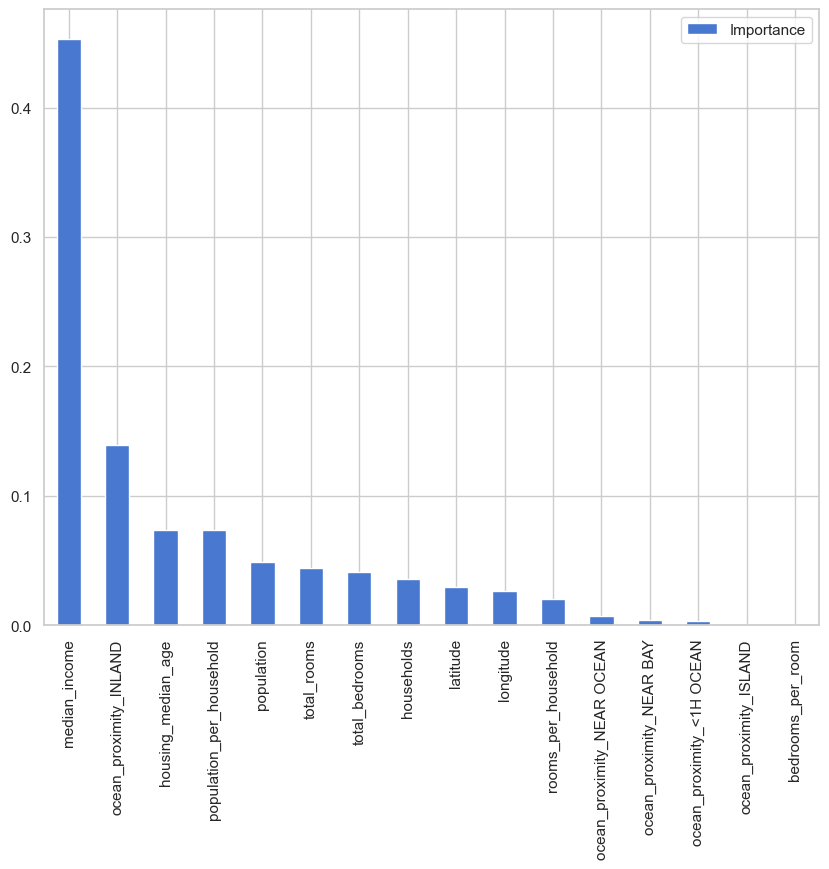

In [159]:
feat_importance.sort_values(by='Importance', ascending=False).plot(
            kind='bar', figsize=(10, 8))
plt.show()